In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
url_recovered = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
url_confirmed = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
url_death = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

data_recovered = pd.read_csv(url_recovered)
data_confirmed = pd.read_csv(url_confirmed)
data_death = pd.read_csv(url_death)
# BD_data = data.loc[data['Country/Region'] == 'Bangladesh']

In [0]:
tmp = pd.DataFrame()
tmp['date'] = BD_data.columns[4:]
# tmp['reported'] = BD_data[data.columns[4:]]
# tmp['reported'] = BD_data[data.columns[4:]].transpose()
# reported = []
# for i in data.columns[4:]:
#   reported.append(int(BD_data[i]))

# reported
data

In [0]:
def make_dataset(data, country ):
  temp_data = data.loc[data['Country/Region'] == country]
  tmp = pd.DataFrame()
  tmp['date'] = data.columns[4:]
  reported = []

  for i in data.columns[4:]:
    reported.append(int(temp_data[i]))
  
  tmp['reported'] = reported

  return tmp

In [0]:
def make_dataset(country):
  c_data = data_confirmed.loc[data_confirmed['Country/Region'] == country]
  r_data = data_recovered.loc[data_recovered['Country/Region'] == country]
  d_data = data_death.loc[data_death['Country/Region'] == country]
  
  tmp = pd.DataFrame()
  dates = c_data.columns[4:]
  tmp['date'] = dates
  confirmed = []
  death = []
  recovery = []


  for i in dates:
    confirmed.append(int(c_data[i]))
    death.append(int(d_data[i]))
    recovery.append(int(r_data[i]))
  
  tmp['confirmed'] = confirmed
  tmp['recovery'] = recovery
  tmp['death'] = death

  return tmp

In [0]:
p = make_dataset('Belgium')
# p.to_csv('Belgium.csv')

In [0]:
p_2 = pd.DataFrame()
p_2['date'] = p['date']
p_2['confirmed'] = p['confirmed']
p_2['death'] = p['death']
p_2['recovery'] = p['recovery']
p_2.set_index('date',inplace=True)


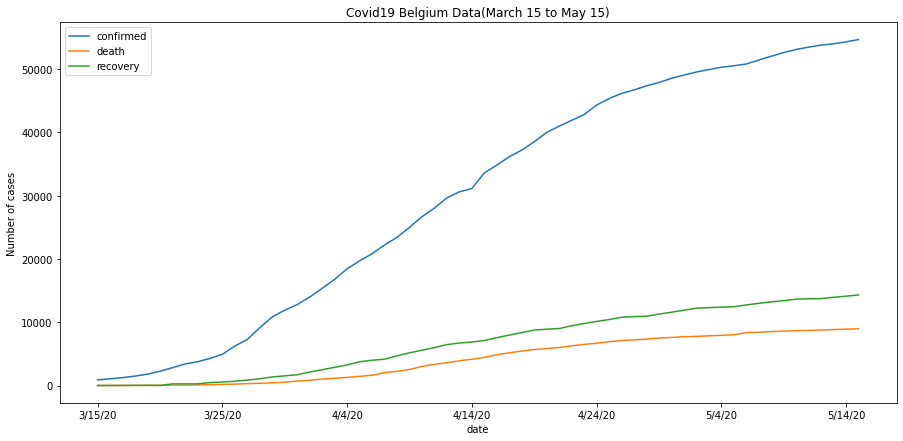

In [28]:
# p_2.set_index('date',inplace=True)
fig, ax = plt.subplots(figsize=(15,7))
ax.set_title('Covid19 Belgium Data(March 15 to May 15)')
ax.set_ylabel('Number of cases')
ax.set_xlabel('Date')
p_2.iloc[-79:-17,0:].plot(ax=ax)
fig.savefig('all.png')

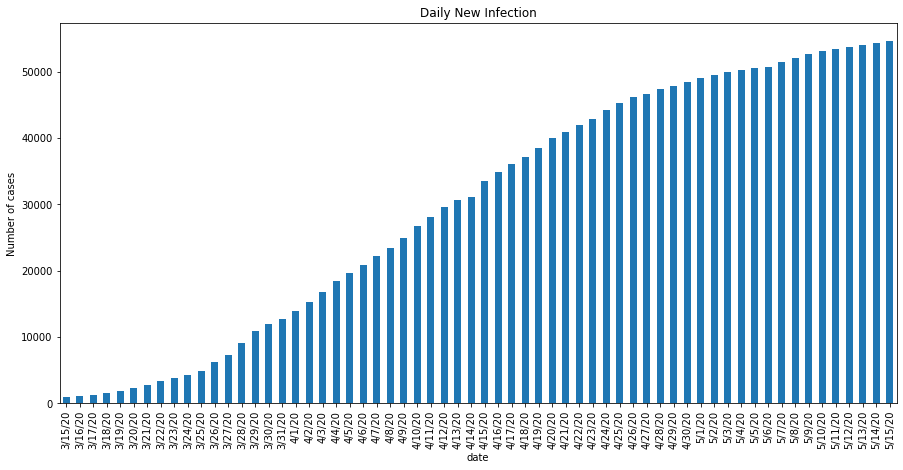

In [72]:
pt_con = p.iloc[-78:-16,0]
fig, ax = plt.subplots(figsize=(15,7))
ax.set_title('Daily New Infection')
ax.set_ylabel('Number of cases')
ax.set_xlabel('Date')
pt_con.plot(kind='bar', ax=ax)
fig.savefig('confirmed.png')

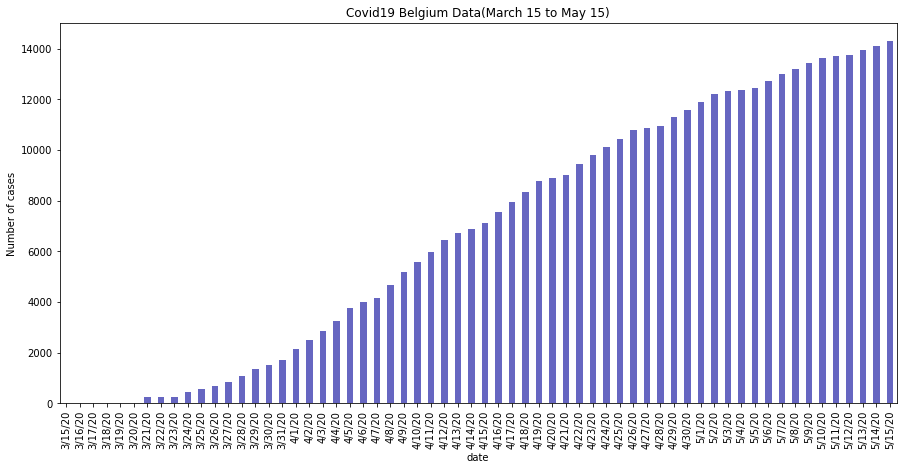

In [51]:
pt_rec = p.iloc[-78:-16,1]
fig, ax = plt.subplots(figsize=(15,7))
ax.set_title('Covid19 Belgium Data(March 15 to May 15)')
ax.set_ylabel('Number of cases')
ax.set_xlabel('Date')
pt_rec.plot(kind='bar', ax=ax, color=(0.0, 0.0, 0.6, 0.6))

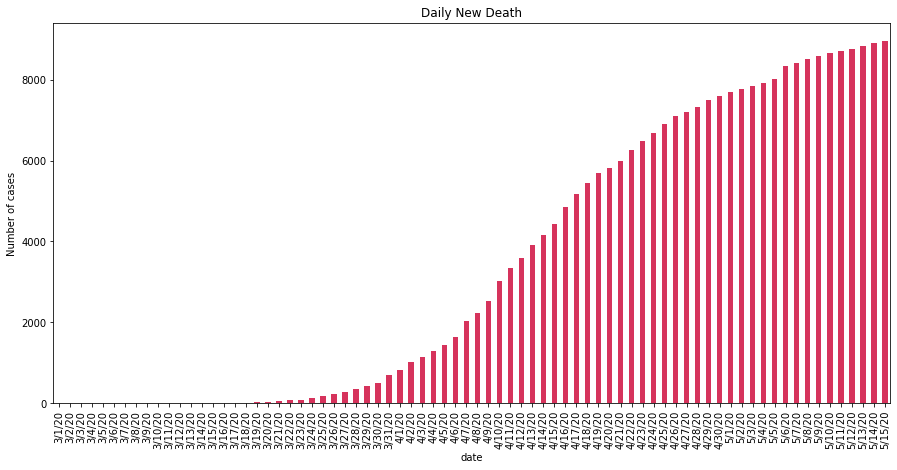

In [74]:
pt_det = p.iloc[-92:-16,2]
fig, ax = plt.subplots(figsize=(15,7))
ax.set_title('Daily New Death')
ax.set_ylabel('Number of cases')
ax.set_xlabel('Date')
ax.xaxis.set_major_locator(ticker.LinearLocator(numticks=3))
pt_det.plot(kind='bar', ax=ax, color=(0.8, 0.0, 0.2,0.8))
fig.savefig('Death.png')

In [0]:
bel_data = pd.read_excel('bel.xlsx')
col = ['date','new_cases', 'new_deaths']
p = bel_data[col]
p = p.iloc[-79:-17,0:]
p.set_index('date',inplace=True)

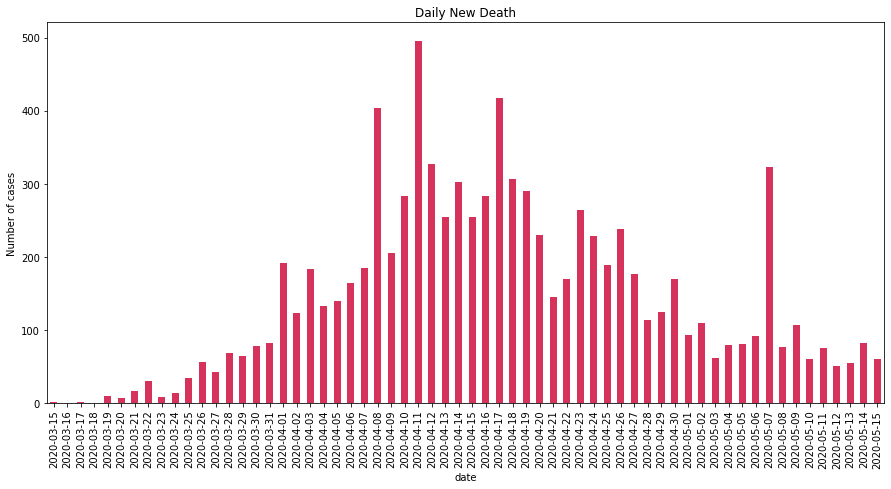

In [34]:
fig, ax = plt.subplots(figsize=(15,7))
ax.set_title('Daily New Death')
ax.set_ylabel('Number of cases')
ax.set_xlabel('Date')
p['new_deaths'].plot(kind='bar', ax=ax, color=(0.8, 0.0, 0.2,0.8))
fig.savefig('new_death.png')

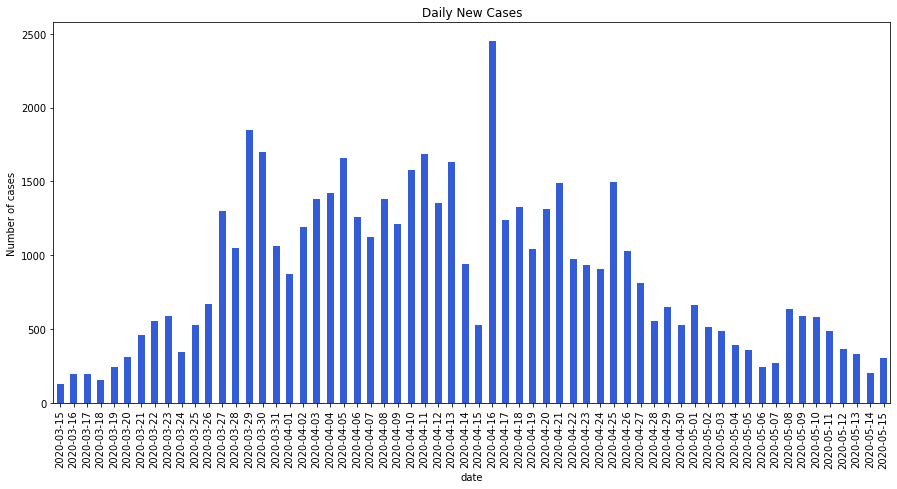

In [33]:
fig, ax = plt.subplots(figsize=(15,7))
ax.set_title('Daily New Cases')
ax.set_ylabel('Number of cases')
ax.set_xlabel('Date')
p['new_cases'].plot(kind='bar', ax=ax, color=(0.0, 0.2, 0.8,0.8))
fig.savefig('new_cases.png')

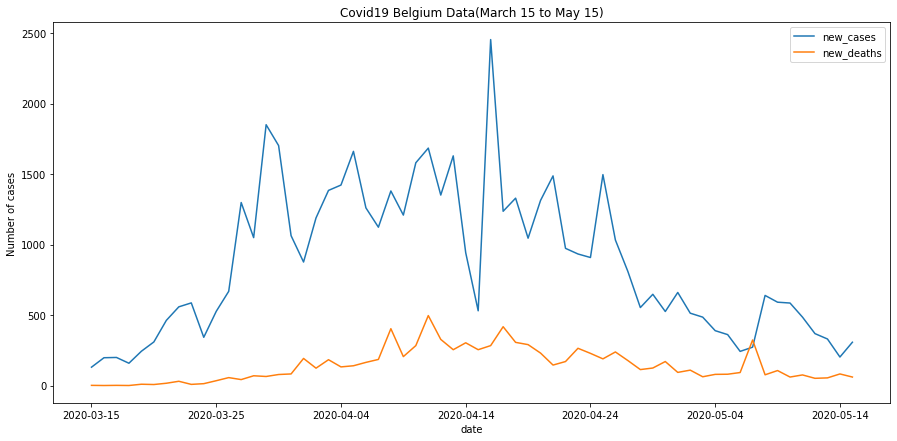

In [35]:
fig, ax = plt.subplots(figsize=(15,7))
ax.set_title('Covid19 Belgium Data(March 15 to May 15)')
ax.set_ylabel('Number of cases')
ax.set_xlabel('Date')
p.plot(ax=ax)
fig.savefig('all_2.png')